In [4]:

# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import ast
import warnings
from sklearn.metrics import r2_score


warnings.filterwarnings("ignore")

# Load the Data
df = pd.read_csv("../dataset/processed/merged_movies_sampled.csv")

# Show dimensions
print(f"Form: {df.shape}")
df.head()

Form: (200000, 26)


,userId,movieId,rating,timestamp,imdbId,tmdbId,budget,genres,homepage,id,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,89996,4878,4.0,2003-01-22 02:00:08,246578,141.0,6000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...",NaN,141,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2001-01-18,1270522,113.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You can never go too far,Donnie Darko,7.7,3452
1,97394,63853,3.5,2009-02-24 02:12:49,455824,6972.0,130000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,6972,...,"[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2008-11-18,49554002,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Welcome to Australia!,Australia,6.3,694
2,88432,350,3.0,1996-09-29 21:46:57,109446,10731.0,45000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,10731,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-07-20,117615211,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A district attorney out for a conviction. A ne...,The Client,6.4,278
3,40619,1594,4.5,2005-12-09 17:54:16,119361,14585.0,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,14585,...,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",1997-01-19,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Are all men bastards...or just misunderstood?,In the Company of Men,6.8,44
4,2161,6539,4.0,2005-03-04 23:39:56,325980,22.0,140000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneyvideos/liveaction/p...,22,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-07-09,655011224,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985


## Iteration 1 – Basisfeatures


In [5]:
# Feature-Auswahl Iteration 1
features = ['budget', 'runtime',]
target = 'rating'

# Entfernt Zeilen mit fehlenden Werten
df = df[features + [target]].dropna()

# Shuffle für Cross-Validation
df = df.sample(frac=1, random_state=42)

# Features und Ziel
X = df[features]
y = df[target]

# Modellfunktion
def evaluate_model(name, model):
    scores = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=5)
    print(f"{name} - RMSE Scores: {np.round(scores, 2)}")
    print(f"{name} - Mean RMSE: {np.round(np.mean(scores), 2)}")

# Evaluation
evaluate_model("Linear Regression", LinearRegression())
evaluate_model("Random Forest", RandomForestRegressor(random_state=42))

Linear Regression - RMSE Scores: [-1.02 -1.02 -1.02 -1.02 -1.02]
Linear Regression - Mean RMSE: -1.02
Random Forest - RMSE Scores: [-0.96 -0.96 -0.96 -0.95 -0.96]
Random Forest - Mean RMSE: -0.96


## Iteration 2 Feature: budget per minute

In [ ]:
# Iteration 2: Add Feature 'budget_per_minute'

# Daten laden
df = pd.read_csv("../dataset/processed/merged_movies_sampled.csv")

# Neue Feature Budget pro Minute
# Division durch 0 oder fehlende Werte
df = df.copy()
df = df[df["runtime"] > 0]  # Nur valide Laufzeiten behalten
df["budget_per_minute"] = df["budget"] / df["runtime"]

# Modellvergleich vorbereiten
def model_performance(features, df, model=RandomForestRegressor(random_state=42)):
    df = df.sample(frac=1, random_state=42)  # Shuffle
    X, y = df[features], df['rating']
    scores = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=5)
    print(model.__class__.__name__, "- RMSE Scores:", np.round(scores, 2))
    print(model.__class__.__name__, "- Mean RMSE:", np.round(np.mean(scores), 2))

# Features definieren
features = ["budget", "runtime", "budget_per_minute"]

# Modelle evaluieren
print("\n--- Iteration 2: Mit 'budget_per_minute' Feature ---")
model_performance(features, df, LinearRegression())
model_performance(features, df, RandomForestRegressor(random_state=42))



--- Iteration 2: Mit 'budget_per_minute' Feature ---
LinearRegression - RMSE Scores: [-1.02 -1.02 -1.02 -1.02 -1.02]
LinearRegression - Mean RMSE: -1.02
RandomForestRegressor - RMSE Scores: [-0.96 -0.96 -0.96 -0.95 -0.96]
RandomForestRegressor - Mean RMSE: -0.96


## Iteration 3 - Release Year/Title Length/Vote Ratio

In [ ]:
# Iteration 3: Mit 'release_year', 'title_length', 'vote_ratio' 

# Feature 1: Release Year
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year.fillna(0).astype(int)

# Feature 2: Title Length
df['title_length'] = df['title'].fillna("").apply(len)

# Feature 3: Vote Ratio
df['vote_ratio'] = df['vote_average'] * df['vote_count']

# Featureset für diese Iteration
features = ['budget', 'runtime', 'release_year', 'title_length', 'vote_ratio']

# Linear Regression
lr_scores = cross_val_score(LinearRegression(), df[features], df['rating'], cv=5, scoring="neg_root_mean_squared_error")
print(f"LinearRegression - RMSE Scores: {np.round(lr_scores, 2)}")
print(f"LinearRegression - Mean RMSE: {np.round(np.mean(lr_scores), 2)}")

# Random Forest
rf_scores = cross_val_score(RandomForestRegressor(random_state=42), df[features], df['rating'], cv=5, scoring="neg_root_mean_squared_error")
print(f"RandomForestRegressor - RMSE Scores: {np.round(rf_scores, 2)}")
print(f"RandomForestRegressor - Mean RMSE: {np.round(np.mean(rf_scores), 2)}")


LinearRegression - RMSE Scores: [-0.99 -1.   -1.   -1.   -1.  ]
LinearRegression - Mean RMSE: -1.0
RandomForestRegressor - RMSE Scores: [-0.94 -0.95 -0.95 -0.95 -0.95]
RandomForestRegressor - Mean RMSE: -0.95


## Iteration 4 –  Test Feature 'vote_average'

In [8]:
# Iteration 4 – Fokus auf das Feature 'vote_average'

# Feature-Auswahl
features = ['budget', 'runtime', 'vote_average']

# Daten vorbereiten
df_model = df[features + ['rating']].dropna().sample(frac=1, random_state=42)

# Bewertungsfunktion
def evaluate_model_rmse(model, features, df):
    X, y = df[features], df['rating']
    scores = cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error")
    return scores

# Modelle definieren
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Bewertung durchführen
lr_scores = evaluate_model_rmse(lr_model, features, df_model)
rf_scores = evaluate_model_rmse(rf_model, features, df_model)

# Ergebnisse ausgeben
print("Linear Regression - RMSE Scores:", np.round(lr_scores, 2))
print("Linear Regression - Mean RMSE:", np.round(np.mean(lr_scores), 2))
print("Random Forest - RMSE Scores:", np.round(rf_scores, 2))
print("Random Forest - Mean RMSE:", np.round(np.mean(rf_scores), 2))


Linear Regression - RMSE Scores: [-0.96 -0.96 -0.95 -0.95 -0.95]
Linear Regression - Mean RMSE: -0.95
Random Forest - RMSE Scores: [-0.95 -0.95 -0.95 -0.94 -0.95]
Random Forest - Mean RMSE: -0.95


## Iteration 5 – Top 10 Studios & Genres

In [24]:
# Iteration 5 – Top 10 Studios & Genres

import ast

# Daten laden
df = pd.read_csv("../dataset/processed/merged_movies_sampled.csv",
                 usecols=['budget', 'runtime', 'vote_average', 'rating', 'production_companies', 'genres'],
                 nrows=100000)

# JSON-Parsing von Studios & Genres
def extract_names(column):
    return column.apply(lambda x: [d['name'] for d in ast.literal_eval(x)] if pd.notnull(x) and x.startswith('[') else [])

df['studios'] = extract_names(df['production_companies'])
df['genres_list'] = extract_names(df['genres'])

# Top 10 Studios & Genres
top_studios = df['studios'].explode().value_counts().nlargest(10).index.tolist()
top_genres = df['genres_list'].explode().value_counts().nlargest(10).index.tolist()

# One-Hot-Encoding für Studios & Genres
for studio in top_studios:
    df[f'studio_{studio}'] = df['studios'].apply(lambda x: int(studio in x))

for genre in top_genres:
    df[f'genre_{genre}'] = df['genres_list'].apply(lambda x: int(genre in x))

# Featureliste erstellen
features = ['budget', 'runtime', 'vote_average'] + \
           [f'studio_{studio}' for studio in top_studios] + \
           [f'genre_{genre}' for genre in top_genres]

# Daten bereinigen
df = df[features + ['rating']].dropna().sample(frac=1, random_state=42)

# Bewertungsfunktion
def evaluate_model_rmse(model, features, df):
    X, y = df[features], df['rating']
    scores = cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error")
    return scores

# Modelle evaluieren
lr_scores = evaluate_model_rmse(LinearRegression(), features, df)
rf_scores = evaluate_model_rmse(RandomForestRegressor(random_state=42), features, df)

# Ergebnisse
print("Linear Regression - Mean RMSE:", np.round(np.mean(lr_scores), 2))
print("Random Forest - Mean RMSE:", np.round(np.mean(rf_scores), 2))


Linear Regression - Mean RMSE: -0.95
Random Forest - Mean RMSE: -0.95


## Iternatin 6 Finale Modellbewertung – Kombination aller wichtigen Features

In [9]:
# 📥 Daten neu laden (optional sauberer Start)
import joblib

df = pd.read_csv("../dataset/processed/merged_movies_sampled.csv")

# 🧪 Feature Engineering
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df['title_length'] = df['title'].astype(str).apply(len)
df['vote_ratio'] = df['vote_average'] * df['vote_count']
df['vote_average'] = df['vote_average'].fillna(0)

# 🔝 Top 10 Genres & Studios
df['genres_list'] = extract_names(df['genres'])
df['studios_list'] = extract_names(df['production_companies'])

top_genres = df['genres_list'].explode().value_counts().nlargest(10).index.tolist()
top_studios = df['studios_list'].explode().value_counts().nlargest(10).index.tolist()

for genre in top_genres:
    df[f'top_genre_{genre}'] = df['genres_list'].apply(lambda x: int(genre in x))

for studio in top_studios:
    df[f'top_studio_{studio}'] = df['studios_list'].apply(lambda x: int(studio in x))

# ✅ Feature-Liste inkl. revenue
features = [
    'budget', 'runtime', 'revenue',
    'release_year', 'title_length', 'vote_ratio', 'vote_average'
] + [f'top_genre_{g}' for g in top_genres] + [f'top_studio_{s}' for s in top_studios]

# 🧹 Datensatz bereinigen
df_model = df[features + ['rating']].dropna().sample(frac=1, random_state=42)

# 📊 Train/Test-Split
X = df_model[features]
y = df_model['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔧 Modelle trainieren
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 📈 RMSE ausgeben
print("--- Linear Regression ---")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

print("--- Random Forest ---")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

# 💾 Modell speichern
joblib.dump(rf, "final_random_forest_model.joblib")


--- Linear Regression ---
Train RMSE: 0.9506225718151455
Test RMSE : 0.95703280757921
--- Random Forest ---
Train RMSE: 0.924952169388122
Test RMSE : 0.9517976216462143


['final_random_forest_model.joblib']

## Iteration 7 GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV

# Parameter-Raster definieren
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearch aufsetzen
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Training starten (dauert je nach Datensatzgröße)
grid_search.fit(X_train, y_train)

# Beste Parameter anzeigen
print("Beste Parameter:", grid_search.best_params_)

# RMSE berechnen mit dem besten Modell
best_rf = grid_search.best_estimator_

train_rmse = np.sqrt(mean_squared_error(y_train, best_rf.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, best_rf.predict(X_test)))

print("\n--- Finales Modell nach GridSearch ---")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE : {test_rmse:.2f}")

# Optional: Modell speichern
joblib.dump(best_rf, "final_random_forest_model_gridsearch.joblib")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Beste Parameter: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

--- Finales Modell nach GridSearch ---
Train RMSE: 0.93
Test RMSE : 0.95


['final_random_forest_model_gridsearch.joblib']

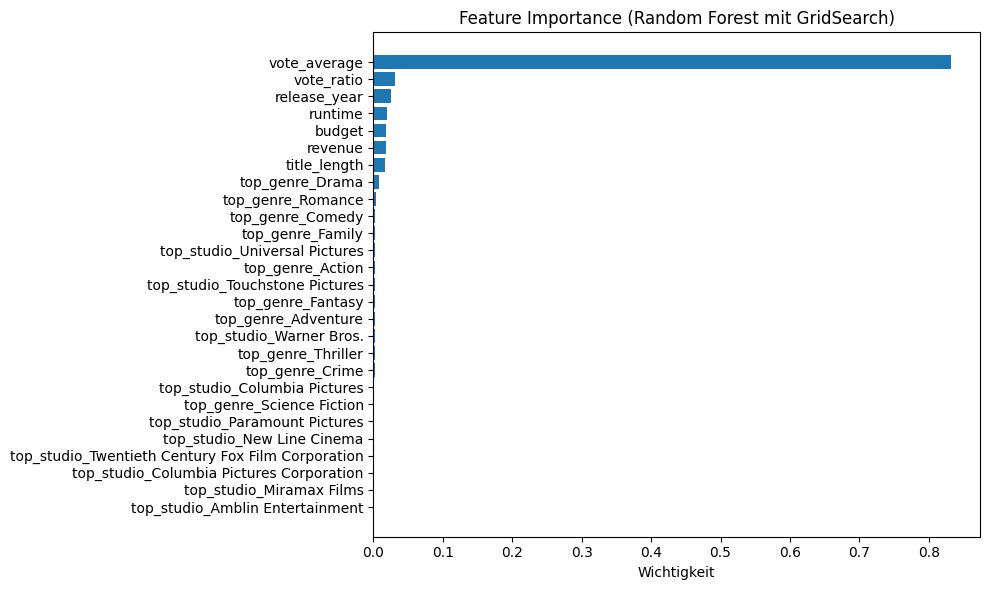

In [11]:
import matplotlib.pyplot as plt

# Feature Importance auslesen
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Sortieren für bessere Darstellung
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance (Random Forest mit GridSearch)")
plt.xlabel("Wichtigkeit")
plt.tight_layout()
plt.show()


## Iteration 8 Model für hugingface ohne vote_avarage, revenue und title_length

Train RMSE: 0.94
Test RMSE : 0.95


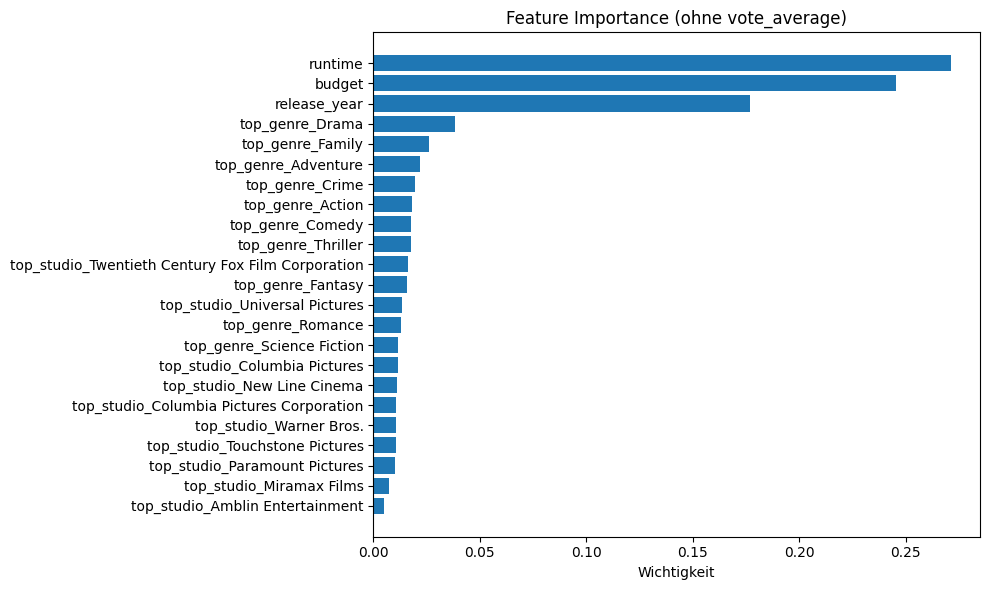

In [ ]:

# Daten laden
df = pd.read_csv("../dataset/processed/merged_movies_sampled.csv")  # Pfad anpassen

# Basis-Features
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# JSON-Spalten parsen
def extract_names(column):
    return column.apply(lambda x: [d['name'] for d in ast.literal_eval(x)] if pd.notnull(x) and isinstance(x, str) and x.startswith('[') else [])

df['genres_list'] = extract_names(df['genres'])
df['studios_list'] = extract_names(df['production_companies'])

# 🔝 Top 10 Genres & Studios
top_genres = df['genres_list'].explode().value_counts().nlargest(10).index.tolist()
top_studios = df['studios_list'].explode().value_counts().nlargest(10).index.tolist()

# One-Hot-Encoding
for genre in top_genres:
    df[f'top_genre_{genre}'] = df['genres_list'].apply(lambda x: int(genre in x))

for studio in top_studios:
    df[f'top_studio_{studio}'] = df['studios_list'].apply(lambda x: int(studio in x))

# Features OHNE 'vote_average'
features = ['budget', 'runtime', 'release_year'] + \
           [f'top_genre_{g}' for g in top_genres] + \
           [f'top_studio_{s}' for s in top_studios]

# Nur vollständige Zeilen & Stichprobe
df_model = df[features + ['rating']].dropna().sample(n=30000, random_state=42)

# Modelltraining
X = df_model[features]
y = df_model['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
model.fit(X_train, y_train)

# Performance
from math import sqrt

train_rmse = sqrt(mean_squared_error(y_train, model.predict(X_train)))
test_rmse = sqrt(mean_squared_error(y_test, model.predict(X_test)))

print("Train RMSE:", round(train_rmse, 2))
print("Test RMSE :", round(test_rmse, 2))

# Feature Importances plotten
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance (ohne vote_average)")
plt.xlabel("Wichtigkeit")
plt.tight_layout()
plt.show()


In [39]:
import joblib
joblib.dump(model, "rf_model_no_voteaverage.joblib")


['rf_model_no_voteaverage.joblib']